# Práctica: Análisis de Componentes Principales (PCA) - Dataset NASA Kepler Exoplanet

**Objetivo:**
  
- Aprender qué es PCA y para qué sirve

- Aplicar PCA sobre un conjunto de datos con varias variables

- Visualizar los datos proyectados en 2D

- Comparar rendimiento de un modelo con y sin PCA

<div style="background-color:#fff0f5; border-left: 6px solid #e75480; padding: 14px; font-size: 16px; line-height: 1.6">

# 📚 <strong>Introducción teórica: ¿Qué es PCA?</strong>

## ¿Qué es PCA (Análisis de Componentes Principales)?

<strong>PCA</strong> (Principal Component Analysis) es una técnica de <strong>reducción de dimensionalidad</strong>.  
Nos permite transformar un conjunto de muchas variables en un nuevo conjunto más pequeño, manteniendo la <strong>mayor parte de la información</strong>.

- Crea nuevas variables llamadas <strong>componentes principales</strong>
- Estas componentes son <strong>combinaciones lineales</strong> de las variables originales
- Capturan la <strong>máxima varianza posible</strong> del conjunto de datos

<em>✨ Imagina que tienes 30 variables. PCA puede encontrar 2 o 3 que resumen casi todo lo importante. ¡Ideal para visualizar o simplificar!</em>

---

## ¿Por qué se usa PCA?

- ✅ Para <strong>reducir el número de variables</strong> sin perder demasiada información
- ✅ Para <strong>visualizar datos multivariantes en 2D o 3D</strong>
- ✅ Para <strong>eliminar redundancia</strong> si hay variables muy correlacionadas
- ✅ Para <strong>evitar overfitting</strong> al reducir la complejidad del modelo
- ✅ Para <strong>acelerar modelos</strong> de aprendizaje automático

---

## ⚠️ ¿Qué NO hace PCA?

- 🚫 <strong>No es un modelo de clasificación o predicción</strong>
- 🚫 <strong>No selecciona las variables originales más importantes</strong>
- 🚫 <strong>No usa la variable objetivo (<code>target</code>)</strong> al calcular las componentes
- 🚫 <strong>No garantiza que las clases queden bien separadas</strong> (aunque a veces lo consigue)

<blockquote>🎯 <em>PCA se usa como técnica de <strong>preprocesamiento</strong>, no como modelo final.</em></blockquote>

</div>

### Carga de NASA Kepler Exoplanet Dataset

- Este fichero tiene múltiples variables numéricas útiles: radio, masa, temperatura, periodo orbital...
- Las variables tienen sentido físico directo
- Posible aplicar clasificación por tipo de planeta
- Ideal para proyectar en 2D y ver si los planetas se agrupan por propiedades

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cumulative.csv")
print("Dimensiones iniciales:", df.shape)
df.head()

Dimensiones iniciales: (9564, 50)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

### 🌌 Análisis de exoplanetas con PCA

Vamos a aplicar **PCA** sobre datos reales del telescopio Kepler, que observó miles de exoplanetas.

Este conjunto contiene información física de los planetas y de sus estrellas, como temperatura, radio, período orbital, etc.

Queremos reducir la dimensionalidad para:
- Visualizar los datos en 2D
- Ver si se agrupan según su clasificación (`CONFIRMED`, `FALSE POSITIVE`, `CANDIDATE`)
- Comparar el rendimiento de un modelo de clasificación antes y después de aplicar PCA


### Seleccionar variables útiles y limpiar

Seleccionamos un subconjunto de variables numéricas que describen las características físicas del planeta y de su estrella:

- `koi_period`: período orbital
- `koi_duration`: duración del tránsito
- `koi_depth`: profundidad del tránsito
- `koi_prad`: radio del planeta
- `koi_teq`: temperatura de equilibrio
- `koi_steff`: temperatura efectiva de la estrella
- `koi_slogg`: gravedad superficial de la estrella
- `koi_srad`: radio de la estrella

También conservamos la columna `koi_disposition` como etiqueta para colorear más adelante.

In [5]:
# Seleccionar columnas numéricas útiles para PCA
columnas_utiles = [
    'koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
    'koi_teq', 'koi_steff', 'koi_slogg', 'koi_srad'
]

# Eliminar filas con valores nulos en esas columnas
df_pca = df[columnas_utiles + ['koi_disposition']].dropna() # añadimos Koi_disposition para target
print("Dimensiones después de limpieza:", df_pca.shape)
df_pca.head()

Dimensiones después de limpieza: (9201, 9)


,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_steff,koi_slogg,koi_srad,koi_disposition
0,9.488036,2.95750,615.8,2.26,793.0,5455.0,4.467,0.927,CONFIRMED
1,54.418383,4.50700,874.8,2.83,443.0,5455.0,4.467,0.927,CONFIRMED
2,19.899140,1.78220,10829.0,14.60,638.0,5853.0,4.544,0.868,FALSE POSITIVE
3,1.736952,2.40641,8079.2,33.46,1395.0,5805.0,4.564,0.791,FALSE POSITIVE
4,2.525592,1.65450,603.3,2.75,1406.0,6031.0,4.438,1.046,CONFIRMED


### Variable objetivo: `koi_disposition`

La columna `koi_disposition` representa el **estado de validación del exoplaneta** observado por el telescopio Kepler.

Esta variable será nuestro **objetivo (target)** para clasificar o visualizar las observaciones tras aplicar PCA.

| Valor            | Significado                                  |
|------------------|----------------------------------------------|
| `CONFIRMED`      | 🌍 **Planeta confirmado** – verificado científicamente |
| `FALSE POSITIVE` | ❌ **Falsa detección** – no es un planeta real |
| `CANDIDATE`      | 🕵️‍♀️ **Candidato** – posible planeta, aún en evaluación |

> Estas tres clases nos permitirán colorear los puntos proyectados con PCA y ver si se separan bien en el espacio reducido.


### Estadísticas descriptivas de las variables seleccionadas

Antes de aplicar PCA, observamos las estadísticas básicas de las variables numéricas seleccionadas.

Esto nos ayuda a:
- Ver el rango de valores
- Detectar posibles outliers
- Confirmar la necesidad de escalar las variables

> PCA es sensible a la escala, así que esta revisión nos orienta para aplicar correctamente `StandardScaler`.


In [6]:
df_pca.describe()

,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_steff,koi_slogg,koi_srad
count,9201.000000,9201.000000,9.201000e+03,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000
mean,74.307951,5.654692,2.379134e+04,102.891778,1085.385828,5706.823280,4.310157,1.728712
std,1360.538847,6.499703,8.224268e+04,3077.639126,856.351161,796.857947,0.432606,6.127185
min,0.241843,0.052000,0.000000e+00,0.080000,25.000000,2661.000000,0.047000,0.109000
25%,2.682768,2.453600,1.599000e+02,1.400000,539.000000,5310.000000,4.218000,0.829000
50%,9.296746,3.824330,4.211000e+02,2.390000,878.000000,5767.000000,4.438000,1.000000
75%,36.856776,6.289000,1.473400e+03,14.930000,1379.000000,6112.000000,4.543000,1.345000
max,129995.778400,138.540000,1.541400e+06,200346.000000,14667.000000,15896.000000,5.364000,229.908000


### Aplicamos PCA

**Normalización**

In [7]:
# Normalización
from sklearn.preprocessing import StandardScaler

# PCA es sensible a la escala de las variables, por lo que normalizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca[columnas_utiles])

**Aplicar PCA reduciendo a 2 componentes principales**

¿Qué es “dos componentes” en PCA?

Cuando hablamos de “2 componentes” en PCA, nos referimos a:

    Dos nuevas variables que el algoritmo crea a partir de las originales, combinándolas.

Se llaman:

- Componente principal 1 (PCA1)

- Componente principal 2 (PCA2)

Estas componentes no son variables del dataset original, sino combinaciones de ellas, y tienen una propiedad muy especial: cada componente captura la máxima variabilidad posible de los datos.

In [8]:
# Aplicar PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Mostramos cuánta varianza explican los componentes**

En un PCA (Análisis de Componentes Principales), el atributo `.explained_variance_ratio_` contiene cuánta proporción de la varianza total de los datos explica cada componente principal.

En este caso veremos cómo PCA1 explica el 26% de la varianza global de todas las variables útiles y PCA2 explica el 15% (aprox.).

In [9]:
# Mostramos cuánta varianza explican los componentes
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.26327196 0.15240118]


**Visualización de las dos componentes**

Creamos un nuevo DataFrame con los resultados del PCA y la clase

In [10]:
# Creamos un nuevo DataFrame con los resultados del PCA y la clase
import pandas as pd
df_pca_final = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca_final['target'] = df_pca['koi_disposition'].values

Visualización en 2D

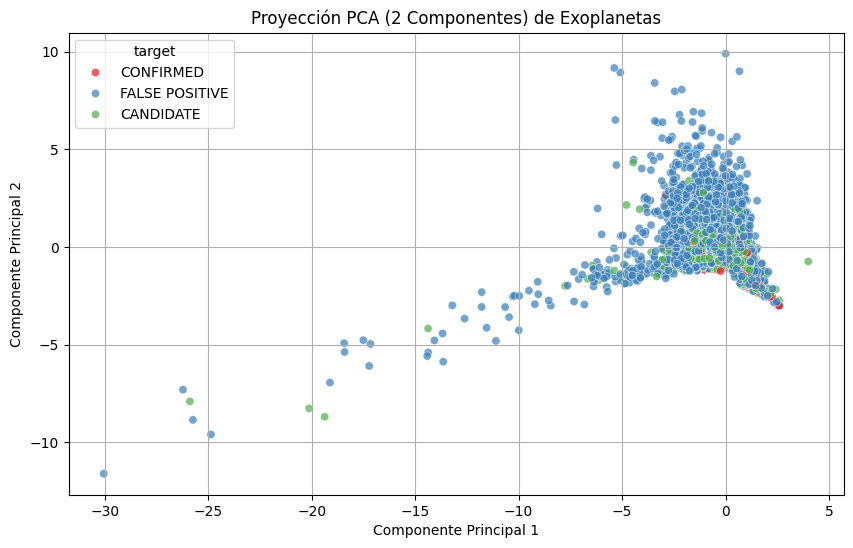

In [11]:
# Visualización en 2D
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_final, x='PCA1', y='PCA2', hue='target', alpha=0.7, palette='Set1')
plt.title('Proyección PCA (2 Componentes) de Exoplanetas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

**Comparación con modelo de clasificación**

##### Ampliación: Regresión Logística Multiclase en Scikit-Learn

En teoría clásica, la **Regresión Logística** está diseñada para resolver **problemas de clasificación binaria**, es decir, donde la variable objetivo (`y`) solo puede tomar dos valores (por ejemplo, 0 y 1).  
Este modelo utiliza la **función sigmoide** para predecir la probabilidad de que una observación pertenezca a una de las dos clases posibles.

Sin embargo, en la práctica moderna, especialmente cuando usamos bibliotecas como **Scikit-Learn**, la regresión logística ha sido extendida para poder manejar **problemas de clasificación multiclase** (más de dos clases).

##### ¿Cómo maneja Scikit-Learn la clasificación multiclase?

Cuando utilizamos el modelo `LogisticRegression` de Scikit-Learn, si detecta que la variable objetivo (`y`) tiene más de dos clases, aplica automáticamente uno de los siguientes enfoques:

- **One-vs-Rest (OvR)** (por defecto):  
  Entrena un clasificador binario para cada clase, aprendiendo a distinguir "esta clase" contra "todas las demás". Luego, predice la clase con mayor probabilidad.

- **Multinomial** (opcional):  
  Trata todas las clases simultáneamente usando una generalización de la función softmax. Este enfoque se usa cuando el parámetro `multi_class='multinomial'` y se emplea un solver compatible (por ejemplo, `'lbfgs'`).

##### ¿Qué significa esto?

- **No es necesario** transformar la variable `y` a 0 y 1 cuando usamos Scikit-Learn con problemas multiclase.
- **Sí es obligatorio** que `y` esté codificada de forma que cada clase sea identificable (por ejemplo, strings distintos o números).
- La **regresión logística sigue siendo "binaria" en su núcleo** (cada modelo interno distingue dos grupos), pero el sistema organiza varios modelos para resolver multiclase automáticamente.

##### Resumen

| Aspecto | Regresión Logística Clásica | Scikit-Learn (`LogisticRegression`) |
|:--|:--|:--|
| Número de clases | Solo 2 clases | 2 o más clases |
| Función de activación | Sigmoide | Sigmoide (OvR) o Softmax (Multinomial) |
| Adaptación multiclase | No (requiere técnicas adicionales) | Sí (automática) |
| Necesidad de transformar `y` | Sí (si no es binaria) | No (maneja multiclase directamente) |

---

**Notas prácticas:**
- Si se desea forzar el enfoque multinomial en Scikit-Learn, se puede usar:
  ```python
  model = LogisticRegression(multi_class='multinomial', solver='lbfgs')


In [12]:
# Comparación con modelo de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creamos conjuntos de entrenamiento y prueba para ambos casos
X = df_pca[columnas_utiles]
y = df_pca['koi_disposition']

# Datos originales
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_orig = LogisticRegression(max_iter=500000)
model_orig.fit(X_train_orig, y_train)
y_pred_orig = model_orig.predict(X_test_orig)

# Datos con PCA (reducidos a 2 dimensiones)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluación y comparación**

In [13]:
# Evaluación y comparación

def evaluar_modelo(y_real, y_pred, nombre):
    print(f"\n📊 Resultados para modelo con {nombre}:")
    print("- Accuracy:", accuracy_score(y_real, y_pred))
    print("- Matriz de confusión:\n", confusion_matrix(y_real, y_pred))
    print("- Reporte de clasificación:\n", classification_report(y_real, y_pred))

evaluar_modelo(y_test, y_pred_orig, "variables originales")
evaluar_modelo(y_test, y_pred_pca, "componentes PCA")


📊 Resultados para modelo con variables originales:
- Accuracy: 0.6040195545898968
- Matriz de confusión:
 [[ 51 253 163]
 [  0 326 112]
 [ 80 121 735]]
- Reporte de clasificación:
                 precision    recall  f1-score   support

     CANDIDATE       0.39      0.11      0.17       467
     CONFIRMED       0.47      0.74      0.57       438
FALSE POSITIVE       0.73      0.79      0.76       936

      accuracy                           0.60      1841
     macro avg       0.53      0.55      0.50      1841
  weighted avg       0.58      0.60      0.56      1841


📊 Resultados para modelo con componentes PCA:
- Accuracy: 0.5350353068984248
- Matriz de confusión:
 [[  0 121 346]
 [  0 139 299]
 [  0  90 846]]
- Reporte de clasificación:
                 precision    recall  f1-score   support

     CANDIDATE       0.00      0.00      0.00       467
     CONFIRMED       0.40      0.32      0.35       438
FALSE POSITIVE       0.57      0.90      0.70       936

      accuracy      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ✅ Conclusiones de la práctica: PCA aplicado a exoplanetas

En esta práctica hemos aplicado **Análisis de Componentes Principales (PCA)** sobre datos reales del telescopio **Kepler** y hemos aprendido que:

---

### 🧠 ¿Qué hemos visto?

- PCA **reduce dimensiones** manteniendo la mayor parte de la información.
- Al reducir a **2 componentes**, pudimos visualizar los datos y ver cómo se distribuyen según su clase (`CONFIRMED`, `CANDIDATE`, `FALSE POSITIVE`).
- PCA **no usa la clase** para calcular las componentes, pero aún así puede separar bien los grupos cuando hay patrones claros.

---

### 🤖 ¿Y los modelos?

- Comparamos un modelo de regresión logística entrenado:
  - Con las variables originales (8 dimensiones)
  - Con las componentes PCA (2 dimensiones)
- Observamos que:
  - El modelo con PCA **puede funcionar bien**, aunque a veces pierde algo de precisión.
  - **PCA ayuda especialmente cuando hay muchas variables o mucha correlación entre ellas.**

---

### 📌 ¿Cuándo usar PCA?

- Cuando queremos **visualizar datos complejos** en 2D o 3D.
- Cuando hay **demasiadas variables** o variables muy correlacionadas.
- Como paso previo en modelos sensibles a la dimensionalidad (como SVM, KNN...).

> 🎯 **PCA no es un modelo predictivo, pero es una herramienta poderosa para comprender y preparar datos complejos.**
